# Bank Customers Churn Model Prediction

First importing necessary libraries and modules

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

#### Reading dataset from csv file using pandas


In [88]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Our dataset have 10K rows and 14 columns. Each columns have no null values as we observe above.

##### Split feature and Target columns and assign to variables

In [90]:
X = df.drop(columns=['Exited'])
y = df['Exited']
print('\n Target columns\n')
print(y.head())
print('\n Feature columns\n')
X.head()


 Target columns

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

 Feature columns



,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


Checking Low or High cardinality and removing columns with cardinality issue since cardinal columns doesnt used for prediction feature extraction.

In [91]:
for column in X.columns:
    print(f'{column}: {df[column].nunique()}' )

RowNumber: 10000
CustomerId: 10000
Surname: 2932
CreditScore: 460
Geography: 3
Gender: 2
Age: 70
Tenure: 11
Balance: 6382
NumOfProducts: 4
HasCrCard: 2
IsActiveMember: 2
EstimatedSalary: 9999


In [92]:
# Drop high cardinal columns [RowNumber, CustomerId, Surname]
X.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
dtypes: float64(2), int64(6), object(2)
memory usage: 781.4+ KB


Lets use Boxplot,Histogram and HeatMap to see distribution of features

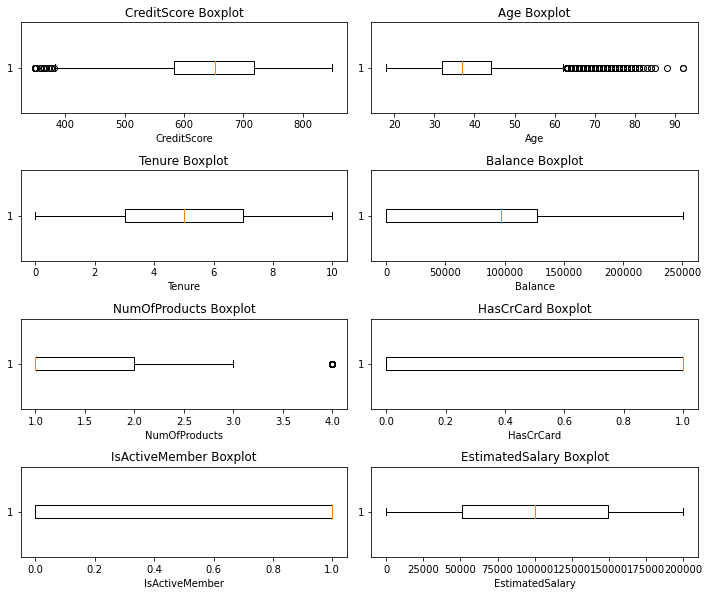

In [93]:
numeric_columns = X.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 10))
for index, column in enumerate(numeric_columns.columns):
    ax = plt.subplot(5, 2, index + 1)
    plt.boxplot(numeric_columns[column], vert=False)
    plt.title(f'{column} Boxplot')
    plt.xlabel(column)
plt.tight_layout()
plt.show()

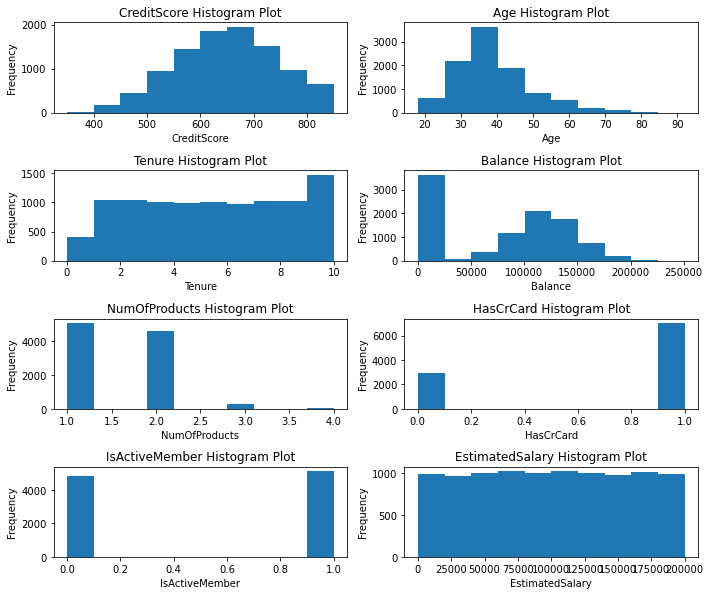

In [94]:
plt.figure(figsize=(10, 10))
for index, column in enumerate(numeric_columns.columns):
    ax = plt.subplot(5, 2, index + 1)
    plt.hist(numeric_columns[column])
    plt.title(f'{column} Histogram Plot')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

##### Use heat map for further Analysis of our feature columns

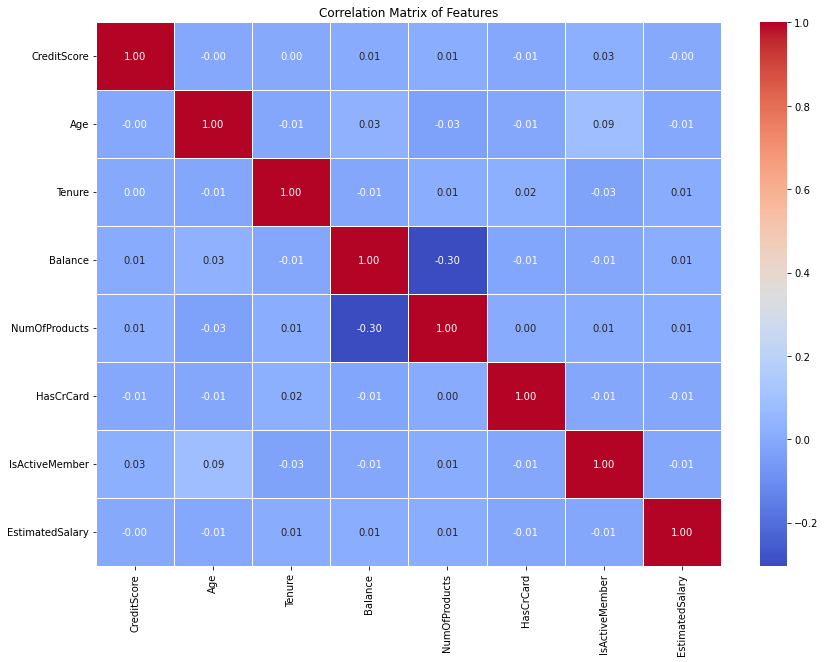

In [95]:
# Compute the correlation matrix for our numeric_columns created above 
corr_matrix = numeric_columns.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()

**Observations from plot**  
- CreditScore has outliers on the left side while data is symetrical
- Age has outliers on the right side while data is symetrical
- Balance looks left skewed with no outlier
##### Now our data set is clean and can be used for training our models 


In [96]:
def calculate_age_group_balance(df):
    df['age_group'] = pd.cut(df['Age'], bins=[0, 30, 50, 100], labels=['Young', 'Middle-aged', 'Old'])
    return df.groupby('age_group')['Balance'].mean()

def count_customers_by_country(df):
    return df['Geography'].value_counts().to_dict()

# Example usage:
avg_balance_by_age = calculate_age_group_balance(df)
customers_by_country = count_customers_by_country(df)


In [97]:
avg_balance_by_age

age_group
Young          73198.764050
Middle-aged    76795.899418
Old            79951.380071
Name: Balance, dtype: float64

In [98]:
customers_by_country

{'France': 5014, 'Germany': 2509, 'Spain': 2477}

Filter top 10 High-Value Customers

Feature Engineering

In [99]:
high_value_customers = [customer_id for customer_id, balance in zip(df['CustomerId'], df['Balance']) if balance > 100000]
high_value_customers[0:10]

[15619304,
 15737888,
 15574012,
 15656148,
 15792365,
 15592389,
 15767821,
 15643966,
 15737452,
 15736816]

In [100]:
df['balance_per_product'] = df['Balance'] / df['NumOfProducts']
df['is_high_value'] = df['Balance'] > df['Balance'].mean()



In [101]:
df[['balance_per_product','is_high_value']].head()

,balance_per_product,is_high_value
0,0.000000,False
1,83807.860000,True
2,53220.266667,True
3,0.000000,False
4,125510.820000,True


**Convert Categorical Variables**
- Convert categorical features to numerical using pd.get_dummies

In [102]:
X = pd.get_dummies(X, columns=['Gender', 'Geography'], drop_first=True)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1


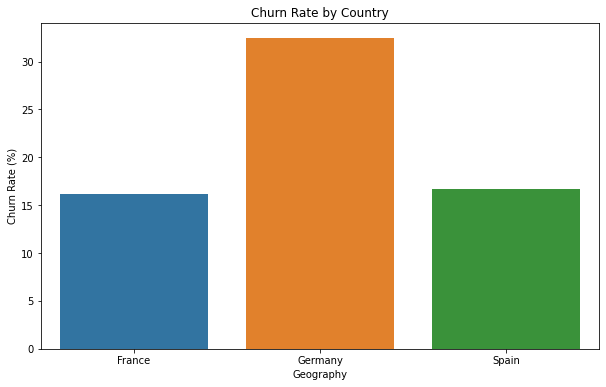

In [103]:
plt.figure(figsize=(10, 6))
churn_rate_by_country = df.groupby('Geography')['Exited'].mean() * 100
sns.barplot(x=churn_rate_by_country.index, y=churn_rate_by_country.values)
plt.title('Churn Rate by Country')
plt.ylabel('Churn Rate (%)')
plt.show()


## Lets train and test our model

#### Train-Test Split(80/20):80 percent for traning and 20 for test

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

Model Training

In [105]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Model Evaluation

In [106]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(X_train)
print("Accuracy:", accuracy_score(y_train, y_train))
print("Classification Report:\n", classification_report(y_train, y_train))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6365
           1       1.00      1.00      1.00      1635

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



In [107]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7905
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.98      0.88      1598
           1       0.35      0.05      0.08       402

    accuracy                           0.79      2000
   macro avg       0.57      0.51      0.48      2000
weighted avg       0.71      0.79      0.72      2000



##### Our LogisticRegression model has an accuracy of **79%** (80% on '0' and 35% on '1' Classification)

Train XGBoost 

In [108]:
xgb_model = XGBClassifier(
    n_estimators=100,         
    learning_rate=0.1,        
    max_depth=4,              
    subsample=0.8,            
    colsample_bytree=0.8,     
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Evaluate XGBoost

Training dataset by calculating the accuracy and making report

In [109]:

y_pred = xgb_model.predict(X_train) #prediction from x_train

accuracy = accuracy_score(y_train, y_train)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_train, y_train))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6365
           1       1.00      1.00      1.00      1635

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



On test dataset

In [110]:
# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.864
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1598
           1       0.75      0.48      0.59       402

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



##### Our XGBoost model has an accuracy of **86.4%** (88% on '0' and 75% on '1' Classification)

#### As we observe from the above The **XGBoost model performs significantly better than the Logistic Regression** model. It achieves higher overall accuracy (86.4% vs. 79%) and classifies both categories more effectively, especially for classification '1' or exited (75% vs. 35%).